In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "data"))
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "utils"))
from DataLoader import DataLoader
from FileParser import FileParser
from DatasetsParser import DatasetsParser

## All citations per paper

In [3]:
d_train = DataLoader()
d_train.training_data_with_abstracts()

d_validation = DataLoader()
d_validation.validation_data_with_abstracts()

d_test = DataLoader()
d_test.test_data_with_abstracts()

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process '

In [4]:
len(d_train.data), len(d_validation.data), len(d_test.data)

(290877, 12990, 21223)

In [5]:
parser = FileParser()
all_citations = pd.DataFrame(list(parser.get_data("chapters_all_citations").items()),
                            columns = ["chapter", "citations"])
len(all_citations)

Process 'chapters_all_citations' not in memory yet.


325281

In [6]:
df = pd.concat([d_train.data, d_validation.data, d_test.data])
df = pd.merge(df, all_citations, how="left", on=["chapter", "chapter"])
print(len(df))
df = df[df.citations.notnull()]
print(len(df))

325090
301270


In [7]:
df["len_citations"] = df.citations.apply(lambda x: len(x))

In [8]:
print("Median number of citations per chapter: {}.".format(df["len_citations"].median()))
print("Mean number of citations per chapter: {}.".format(df["len_citations"].mean()))
print("Minimum number of citations per chapter: {}.".format(df["len_citations"].min()))
print("Maximum number of citations per chapter: {}.".format(df["len_citations"].max()))

Median number of citations per chapter: 11.0.
Mean number of citations per chapter: 12.685972715504365.
Minimum number of citations per chapter: 1.
Maximum number of citations per chapter: 438.


In [10]:
df[df["len_citations"]==438]

,chapter,chapter_abstract,chapter_title,conferenceseries,conferenceseries_name,citations,len_citations
268130,sg:pub.10.1007/978-3-540-49676-2_24,This bibliography contains a list of reference...,Select Z Bibliography,<http://scigraph.springernature.com/things/con...,International Conference on Abstract State Mac...,"[sg:pub.10.1007/3-540-54834-3_48, sg:pub.10.10...",438


## Citations per paper (towards other SciGraph papers)

In [11]:
d_train = DataLoader()
d_train.training_data_with_abstracts()

d_validation = DataLoader()
d_validation.validation_data_with_abstracts()

d_test = DataLoader()
d_test.test_data_with_abstracts()

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process '

In [12]:
len(d_train.data), len(d_validation.data), len(d_test.data)

(290877, 12990, 21223)

In [13]:
parser = DatasetsParser()
scigraph_citations = parser.get_data("chapters_all_scigraph_citations")
len(scigraph_citations)

Process 'chapters_all_scigraph_citations' not in memory yet.


253834

In [14]:
df = pd.concat([d_train.data, d_validation.data, d_test.data])
df = pd.merge(df, scigraph_citations, how="left", on=["chapter", "chapter"])
print(len(df))
df = df[df.chapter_citations.notnull()]
print(len(df))

325090
235111


In [15]:
df["len_citations"] = df.chapter_citations.apply(lambda x: len(x))

In [16]:
print("Median number of citations per chapter: {}.".format(df["len_citations"].median()))
print("Mean number of citations per chapter: {}.".format(df["len_citations"].mean()))
print("Minimum number of citations per chapter: {}.".format(df["len_citations"].min()))
print("Maximum number of citations per chapter: {}.".format(df["len_citations"].max()))

Median number of citations per chapter: 4.0.
Mean number of citations per chapter: 6.012241026578935.
Minimum number of citations per chapter: 1.
Maximum number of citations per chapter: 258.


In [17]:
df[df["len_citations"]==258]

,chapter,chapter_abstract,chapter_title,conferenceseries,conferenceseries_name,chapter_citations,len_citations
268130,sg:pub.10.1007/978-3-540-49676-2_24,This bibliography contains a list of reference...,Select Z Bibliography,<http://scigraph.springernature.com/things/con...,International Conference on Abstract State Mac...,"[sg:pub.10.1007/3-540-54834-3_48, sg:pub.10.10...",258


## Citations per paper (towards other SciGraph conferenece proceedings)

### General statistics

In [18]:
d_train = DataLoader()
d_train.training_data_with_abstracts()

d_validation = DataLoader()
d_validation.validation_data_with_abstracts()

d_test = DataLoader()
d_test.test_data_with_abstracts()

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process '

In [19]:
len(d_train.data), len(d_validation.data), len(d_test.data)

(290877, 12990, 21223)

In [20]:
parser = DatasetsParser()
selected_scigraph_citations = parser.get_data("chapters_confproc_scigraph_citations")
len(scigraph_citations)

Process 'chapters_confproc_scigraph_citations' not in memory yet.


253834

In [21]:
df = pd.concat([d_train.data, d_validation.data, d_test.data])
df = pd.merge(df, selected_scigraph_citations, how="left", on=["chapter", "chapter"])
print(len(df))
df = df[df.chapter_citations.notnull()]
print(len(df))

325090
156487


In [22]:
df["len_citations"] = df.chapter_citations.apply(lambda x: len(x))

In [23]:
print("Median number of citations per chapter: {}.".format(df["len_citations"].median()))
print("Mean number of citations per chapter: {}.".format(df["len_citations"].mean()))
print("Minimum number of citations per chapter: {}.".format(df["len_citations"].min()))
print("Maximum number of citations per chapter: {}.".format(df["len_citations"].max()))

Median number of citations per chapter: 3.0.
Mean number of citations per chapter: 4.799638308613495.
Minimum number of citations per chapter: 1.
Maximum number of citations per chapter: 129.


In [24]:
df[df["len_citations"]==129]

,chapter,chapter_abstract,chapter_title,conferenceseries,conferenceseries_name,chapter_citations,len_citations
117538,sg:pub.10.1007/11735106_1,This paper summarises the scientific work pres...,Progress in Information Retrieval,<http://scigraph.springernature.com/things/con...,European Conference on Information Retrieval,"[sg:pub.10.1007/11735106_38, sg:pub.10.1007/11...",129


### Statistics per dataset

In [25]:
d_train = DataLoader()
d_train.training_data_with_abstracts_citations()

d_validation = DataLoader()
d_validation.validation_data_with_abstracts_citations()

d_test = DataLoader()
d_test.test_data_with_abstracts_citations()

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_confproc_scigraph_citations' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memo

In [26]:
len(d_train.data), len(d_validation.data), len(d_test.data)

(137376, 7511, 11600)

In [27]:
df_train = d_train.data
df_train["len_citations"] = df_train.chapter_citations.apply(lambda x: len(x))

df_validation = d_validation.data
df_validation["len_citations"] = df_validation.chapter_citations.apply(lambda x: len(x))

df_test = d_test.data
df_test["len_citations"] = df_test.chapter_citations.apply(lambda x: len(x))

### Statistics training data

In [28]:
print("Median number of citations per chapter: {}.".format(df_train["len_citations"].median()))
print("Mean number of citations per chapter: {}.".format(df_train["len_citations"].mean()))
print("Minimum number of citations per chapter: {}.".format(df_train["len_citations"].min()))
print("Maximum number of citations per chapter: {}.".format(df_train["len_citations"].max()))

Median number of citations per chapter: 3.0.
Mean number of citations per chapter: 4.772361984626135.
Minimum number of citations per chapter: 1.
Maximum number of citations per chapter: 129.


In [29]:
len(df_train[df_train.len_citations==1])

21162

In [30]:
df_train[df_train.len_citations==129]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,len_citations
43120,sg:pub.10.1007/11735106_1,This paper summarises the scientific work pres...,"[sg:pub.10.1007/11735106_38, sg:pub.10.1007/11...",Progress in Information Retrieval,<http://scigraph.springernature.com/things/con...,European Conference on Information Retrieval,129


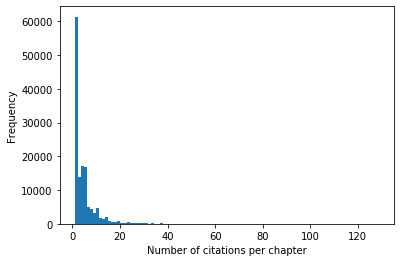

In [31]:
df_train["len_citations"].plot(kind="hist",bins=100)
plt.legend().remove()
plt.xlabel("Number of citations per chapter")
plt.show()

### Statistics validation data

In [32]:
print("Median number of citations per chapter: {}.".format(df_validation["len_citations"].median()))
print("Mean number of citations per chapter: {}.".format(df_validation["len_citations"].mean()))
print("Minimum number of citations per chapter: {}.".format(df_validation["len_citations"].min()))
print("Maximum number of citations per chapter: {}.".format(df_validation["len_citations"].max()))

Median number of citations per chapter: 3.0.
Mean number of citations per chapter: 5.104912794567967.
Minimum number of citations per chapter: 1.
Maximum number of citations per chapter: 65.


In [33]:
len(df_validation[df_validation.len_citations==1])

1599

In [37]:
df_validation[df_validation.len_citations==65]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,len_citations
5229,sg:pub.10.1007/978-3-662-46803-6_17,We provide a new framework of cryptographic ag...,"[sg:pub.10.1007/978-3-540-70936-7_29, sg:pub.1...",Cryptographic Agents: Towards a Unified Theory...,<http://scigraph.springernature.com/things/con...,Workshop on Cryptography,65


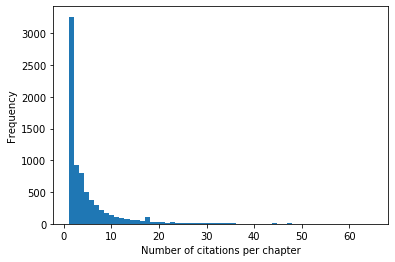

In [35]:
df_validation["len_citations"].plot(kind="hist",bins=60)
plt.legend().remove()
plt.xlabel("Number of citations per chapter")
plt.show()

### Statistics test data

In [38]:
print("Median number of citations per chapter: {}.".format(df_test["len_citations"].median()))
print("Mean number of citations per chapter: {}.".format(df_test["len_citations"].mean()))
print("Minimum number of citations per chapter: {}.".format(df_test["len_citations"].min()))
print("Maximum number of citations per chapter: {}.".format(df_test["len_citations"].max()))

Median number of citations per chapter: 3.0.
Mean number of citations per chapter: 4.925.
Minimum number of citations per chapter: 1.
Maximum number of citations per chapter: 70.


In [39]:
len(df_test[df_test.len_citations==1])

2840

In [40]:
df_test[df_test.len_citations==70]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,len_citations
9008,sg:pub.10.1007/978-3-662-53890-6_13,"A recent line of works – initiated by Gordon, ...","[sg:pub.10.1007/11426639_18, sg:pub.10.1007/11...",Signature Schemes with Efficient Protocols and...,<http://scigraph.springernature.com/things/con...,International Workshop on the Theory and Appli...,70


In [ ]:
df_test["len_citations"].plot(kind="hist",bins=70)
plt.legend().remove()
plt.xlabel("Number of citations per chapter")
plt.show()